In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [5]:
qreg_q = QuantumRegister(9, 'q')
qreg_q_ancilla = QuantumRegister(8, 'q_ancilla')
creg_c = ClassicalRegister(9, 'c')
creg_sindrome1 = ClassicalRegister(2, 'sindrome1')
creg_sindrome2 = ClassicalRegister(2, 'sindrome2')
creg_sindrome3 = ClassicalRegister(2, 'sindrome3')
circuit = QuantumCircuit(qreg_q, qreg_q_ancilla, creg_c, creg_sindrome1, creg_sindrome2, creg_sindrome3)

Codificación

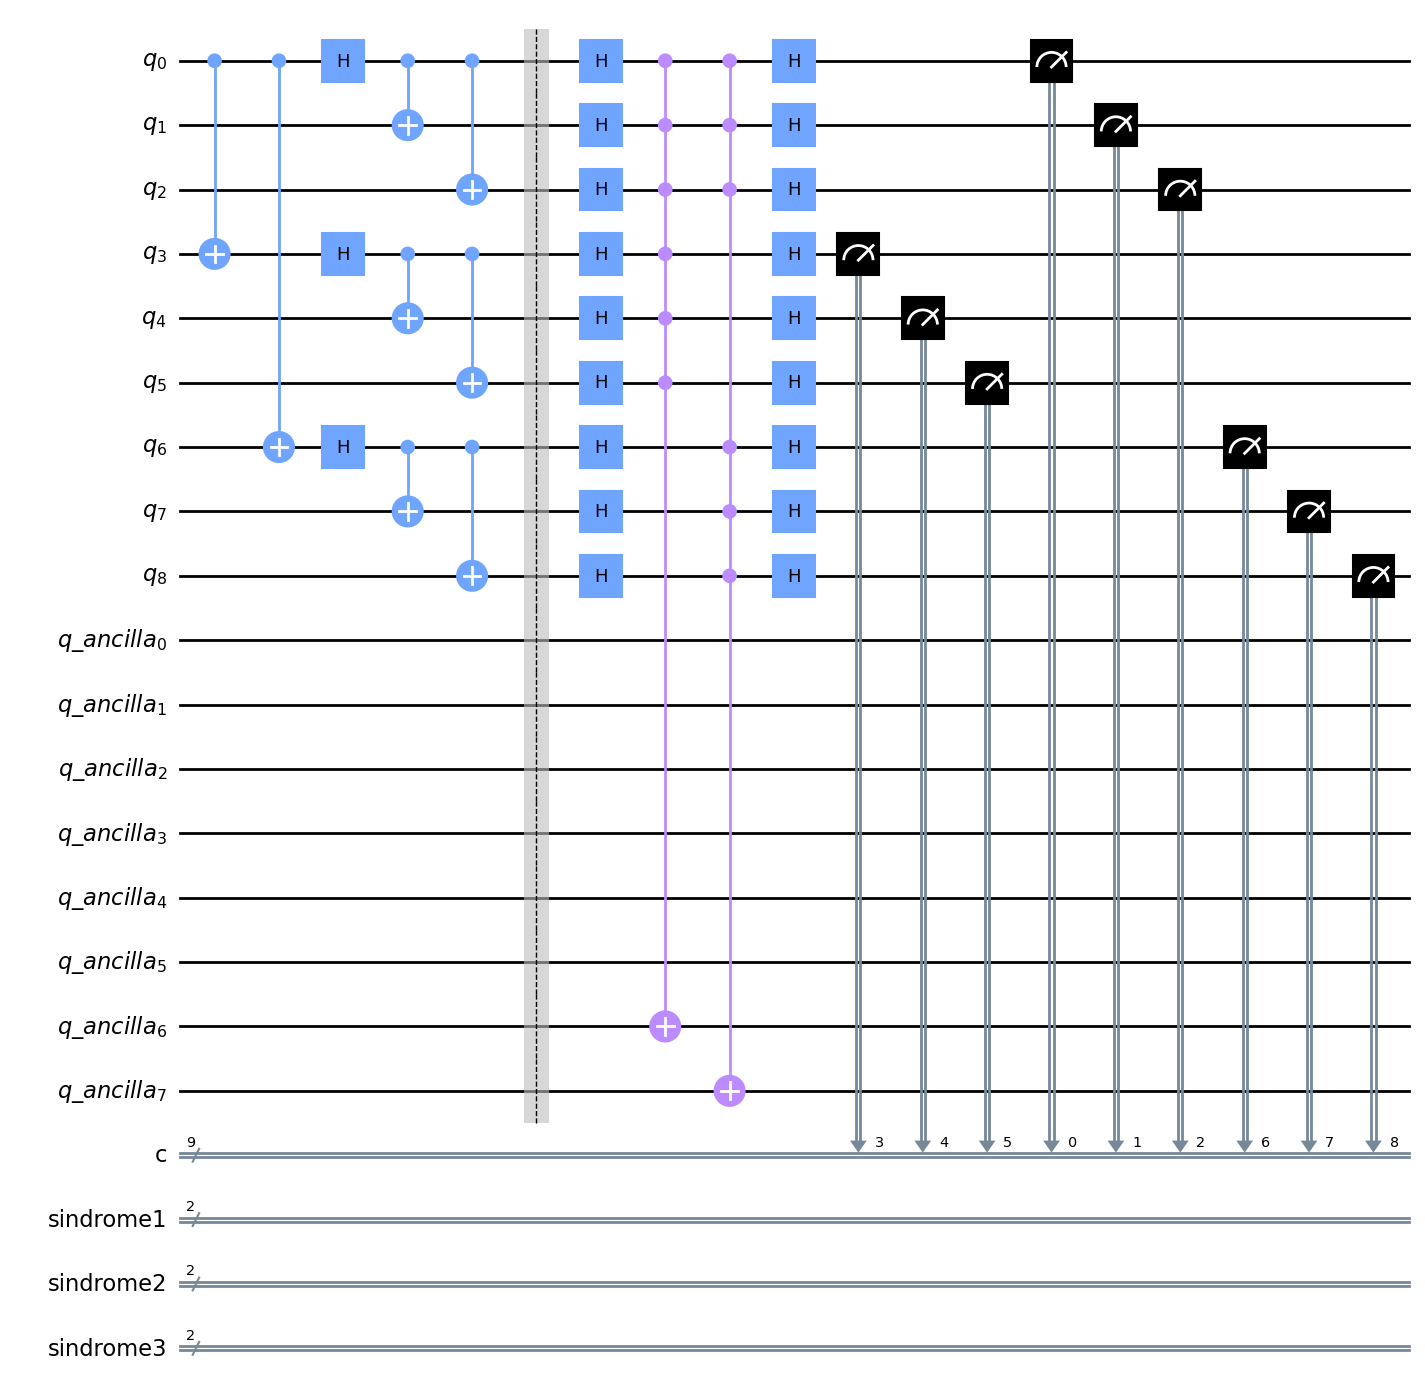

In [6]:
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[6])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[6])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[6], qreg_q[7])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[6], qreg_q[8])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], 
                qreg_q[3], qreg_q[4], qreg_q[5], 
                qreg_q[6], qreg_q[7], qreg_q[8],
                qreg_q_ancilla[0], qreg_q_ancilla[1], 
                qreg_q_ancilla[2], qreg_q_ancilla[3], 
                qreg_q_ancilla[4], qreg_q_ancilla[5], 
                qreg_q_ancilla[6], qreg_q_ancilla[7])


circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.h(qreg_q[7])
circuit.h(qreg_q[8])


circuit.mcx(qreg_q[0:6], qreg_q_ancilla[6], mode='noancilla')
circuit.mcx([qreg_q[i] for i in [0,1,2,6,7,8]], qreg_q_ancilla[7], mode='noancilla')

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[6])
circuit.h(qreg_q[7])
circuit.h(qreg_q[8])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.measure(qreg_q[5], creg_c[5])
circuit.measure(qreg_q[6], creg_c[6])
circuit.measure(qreg_q[7], creg_c[7])
circuit.measure(qreg_q[8], creg_c[8])

circuit.measure(qreg_q_ancilla[6], creg_sindrome1[0])
circuit.measure(qreg_q_ancilla[7], creg_sindrome1[1])
circuit.draw(output='mpl', style="clifford")
